<div style = 'font-family: Calibri, sans-serif'>
    <h1> Analyzing Food Options Around U.S. Sports Stadiums </h1>
</div>

<div style = 'font-family: Calibri, sans-serif'>

<strong> Gokul Prasad (A15935807)  & Aryaman Sinha (A15828821) </strong>
    
</div>

<div style = 'font-family: Calibri, sans-serif'>

## 1. Questions Answered


In this project, we look to analyze any patterns in the surrounding food options around U.S. stadiums.

With our dataset, we have several lines of inquiry that we could pursue. We are interested in exploring the following questions:

### 1.1 Are there “trends” as to the category of restaurants most commonly found per league?
- We expect to find that there are regional differences (i.e., Southern cities would have more nearby places like barbecue, while coastal cities would have more seafood options) that reflect U.S. cultural differences; however, we do not expect to see league-based differences as many cities overlap between leagues (i.e., New York Jets (NFL) vs New York Knicks (NBA)).


### 1.2 Which stadium contains the highest rated restaurants in its nearby zone?
- We expect to find this city somewhere near a generally major U.S. cultural hub, as more diverse culinary options will likely improve the chances of finding higher amounts of well-rated restaurants. Therefore, we are expecting this to be in a NYC-based or Los-Angeles stadium, as those are the two most populous metropolitan areas in the country.

### 1.3 Which league & stadium have the most diverse food options?
- This one may be slightly trickier to answer, as we have to define what “diverse” means, but the general approach would be to use the category of restaurant,and see which league/stadium has the highest amount of unique categories. Again, like the previous question, we anticipate this to be in major U.S. cultural centers, so NYC or LA metro areas

<div style = 'font-family: Calibri, sans-serif'>
    
## 2. Background & Literature

There has been work done previously to analyze the location of sports stadiums; however, the vast majority of this research has been about the economic causes and impacts these locations have on the nearby communities. Little substantial research has been conducted in specific to the topic of 'food options' around sporting stadiums. Nonetheless, looking at the available literature is an important step to contextualizing our work and setting a baseline.

A few research publications in this vein include:

### 2.1 *Localized economic impact of sports stadium construction*
Scott Sommers, University of Richmond

Here, the researcher discusses how the building of sports stadiums has a tangible economic impact on the creation and maintenance of local businesses in the surrounding area. With respect to restaurants, which is relevant to our question, the paper found that building a stadium can increase the number of nearby restaurants by nearly 10. Stadiums attract tourism and high publicity, and obviously restaurants would also benefit from this. Furthermore, we would expect to see generally high price restaurants to attract those leaving the stadium after games rather. The publication can be found [here](https://scholarship.richmond.edu/cgi/viewcontent.cgi?article=1959&context=honors-theses)
    
### 2.2 *How Location Matters in Restaurant Success?*
Xiangbin Yang & Jing Wang, Pacific Asian Conference on Information Systems

Here, the researchers discuss how the location of a restaurant has a significant impact on its economic success. They conclude that restaurant that locate themselves in “hot” areas of high societal and cultural activity have greater success than others; while the restaurants were chosen from China, the overall conclusion should reflect in the diversity of restaurants around stadiums. The publication can be found [here](https://core.ac.uk/download/pdf/301373001.pdf).

### 2.3 *Availability and marketing of food and beverages to children through sports settings: a systematic review*
Mary-Ann Carter, R Edwards, L Signal & J Hoek, Cambridge University Press

The paper provides information on the physical, economic, and political environments surrounding food and beverage sponsorship and promotion in sports settings. The authors found that food and beverage sponsorship is prevalent, particularly by unhealthy food and beverage companies, and that there is a need for healthier food options. The findings suggest that the types of food available at sports stadiums in the US should be examined to see if they align with the nutritional recommendations for children. The publication can be found [here](https://www.cambridge.org/core/journals/public-health-nutrition/article/availability-and-marketing-of-food-and-beverages-to-children-through-sports-settings-a-systematic-review/B59EEFDBA4BD3087527E5D69DB23893C).

### 2.4 *Alcohol Control Policies and Practices at Professional Sports Stadiums*
Kathleen M. Lenk, Traci L. Toomey, Darin J. Erickson, Gunna R. Kilian, Toben F. Nelson, & Lindsey E.A. Fabian, Public Health Reports

This paper reveals that alcohol policies in U.S. sporting stadiums have a fairly-high level of inconsistency across the country with respect to who can serve alcohol, but many do enforce limitations on amount. While the focus is on food consumption *inside* the stadium, the results still are pertinent to our research. Specifically, we would expect to see many restaurants with tags that specify they can serve alcohol so that patrons can overcome limitations enforced by stadiums. The publication can be found [here](https://journals.sagepub.com/doi/pdf/10.1177/003335491012500508).


<div style = 'font-family: Calibri, sans-serif'>

## 3. Python Modules / ArcGIS Features Used

Some of the necessary Python packages we will use include:

#### Data Processing & Storage
- `pandas`: 
    - We will use this package to help with data storage, cleaning, and initial visualization for summary statistics. 
- `geopandas`: 
   - Given that we have access to several latitude & longitude coordinates, we can convert our `DataFrame` variables to `geoDataFrame` ones, and use the extensive functionality within the library to create geospatial visuals. 
#### Visualization
- `folium`
    - We will use this package to make interactive, scrollable, and scalable maps of U.S. based stadiums and food trends. 
- `matplotlib`
    - This will help with our preliminary EDA and showing distribution of data points.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import warnings

warnings.filterwarnings('ignore')

<div style = 'font-family: Calibri, sans-serif'>

## 4. Data Sources
    
### 4.1 ***Sports and Restaurants***

- [Kaggle Source]((https://www.kaggle.com/datasets/xavier4t/sports-and-restaurants))

- Information
    - Sourced programatically from the Yelp API and made publicly available on Kaggle. 
    - Pertinent to teams/stadiums belonging to one of the five biggest U.S. sports leagues: 
        - MLB (baseball)
        - NFL (American football)
        - NBA (Basketball)
        - NHL (Ice hockey)
        - MLS (Soccer)
    
    - The radius around each stadium is specifically 3000m (1.86mi)

In [2]:
# This will be modified for GIS access

df = pd.read_csv('../data/restaurants.csv')
df.head()

,name,rating,price,categories,latitude,longitude,league,team,stadium,team_latitude,team_longitude,state,city
0,Oriole,5.0,4.0,newamerican,41.886097,-87.644948,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
1,Spinning J Bakery and Soda Fountain,4.5,2.0,"coffee, breakfast_brunch, sandwiches",41.899450,-87.697160,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
2,S.K.Y.,4.5,3.0,"newamerican, cocktailbars, wine_bars",41.857808,-87.658043,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
3,Kai Zan,4.5,3.0,"asianfusion, japanese, sushi",41.895505,-87.691541,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
4,Sabroso! Mexican Grill,4.5,2.0,"mexican, breakfast_brunch, newmexican",41.893190,-87.667530,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago


<div style = 'font-family: Calibri, sans-serif'>

## 5. Data Cleaning 
    
Some of the initial cleaning goals we will need to accomplish:
- Remove all non-US based data (Canadian teams exist in NBA & NHL)
- Clean up any inconsistencies in naming data (i.e, New York City and Brooklyn both exist)

In [3]:
# find all canadian-based locations & remove
canadian = ['BC', 'British Columbia', 'Ontario', 'Montreal', 'Alberta', 'Manitoba', 'Quebec']
usa = df[~df['state'].isin(canadian)]

# cleaning functions

def clean_city(city):
    '''
    Replaces a city marked as a NYC burrough as New York City. 
    '''
    
    nyc_burrough = ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Long Island']
    if city in nyc_burrough:
        city = 'New York City'
        
    return city

# apply all functions
usa['city'] = usa['city'].apply(clean_city)

# drop all null-data
usa.dropna(inplace=True)

usa.reset_index(drop=True, inplace=True)
usa.head()

,name,rating,price,categories,latitude,longitude,league,team,stadium,team_latitude,team_longitude,state,city
0,Oriole,5.0,4.0,newamerican,41.886097,-87.644948,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
1,Spinning J Bakery and Soda Fountain,4.5,2.0,"coffee, breakfast_brunch, sandwiches",41.899450,-87.697160,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
2,S.K.Y.,4.5,3.0,"newamerican, cocktailbars, wine_bars",41.857808,-87.658043,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
3,Kai Zan,4.5,3.0,"asianfusion, japanese, sushi",41.895505,-87.691541,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
4,Sabroso! Mexican Grill,4.5,2.0,"mexican, breakfast_brunch, newmexican",41.893190,-87.667530,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago


<div style = 'font-family: Calibri, sans-serif'>

It will also be helpful to have a way to limit our categories to just a single one that's representative of the tags. One way we can achieve this is to figure out which tag per restaurant is the most common tag across the entire dataset. For example, if Restaurant A has tags ['american', 'bar', 'hotdogs'] and 'american' is the most common tag of the three in the dataset as a whole, then Restaurant A's single-tag will be 'american'. 

In [4]:
# create copy-df for single counts ONLY
single_count = usa.copy(deep=False)
single_count['categories'] = usa['categories'].apply(lambda x: x.strip().replace(' ', '').split(','))
single_count.head()

# get counts per tag
category_count = {}
for entry in single_count['categories']:
    for cat in entry:
        if cat not in category_count.keys():
            category_count[cat] = 1
        else:
            category_count[cat] += 1

def find_max(category):
    
    '''
    Finds the key with the max value for a list of keys
    '''
    
    # find max
    max_count = 0
    best_category = 'null'
    for entry in category:
        entry = entry.replace(' ', '')
        if category_count[entry] > max_count:
            max_count = category_count[entry]
            best_category = entry
            
    return best_category

single_count['categories'] = single_count['categories'].apply(find_max)

single_count.head()

,name,rating,price,categories,latitude,longitude,league,team,stadium,team_latitude,team_longitude,state,city
0,Oriole,5.0,4.0,newamerican,41.886097,-87.644948,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
1,Spinning J Bakery and Soda Fountain,4.5,2.0,sandwiches,41.899450,-87.697160,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
2,S.K.Y.,4.5,3.0,newamerican,41.857808,-87.658043,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
3,Kai Zan,4.5,3.0,sushi,41.895505,-87.691541,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago
4,Sabroso! Mexican Grill,4.5,2.0,breakfast_brunch,41.893190,-87.667530,NBA,Chicago Bulls,United Center,41.880556,-87.674167,Illinois,Chicago


<div style = 'font-family: Calibri, sans-serif'>

So now we have two fully-cleaned dataframes:

- `usa`: This dataframe contains all information for any U.S. based restaurant

- `single_count`: The same as `usa`, only with a single category for visualization's sake later on. 

<div style = 'font-family: Calibri, sans-serif'>

## 6. Descriptive Statistics
    
### 7.1 Average Rating & Price
In our hypotheses, we stated that we expect American cultural hubs like New York City and Los Angeles to be the most commonly appearing markers when the data is measured by average rating and price. Let's answer this in three ways:
    - Individual Stadium
    - State
    - City 
#### 7.1.1 Individual Stadium
Let's group the data by stadium, and plot out the top 5 stadiums by average rating and price of the surrounding restaurants. 

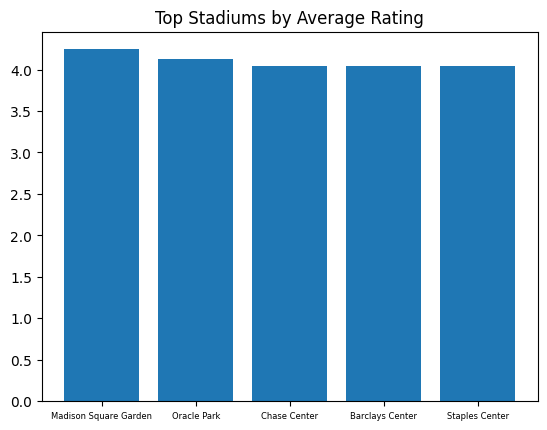

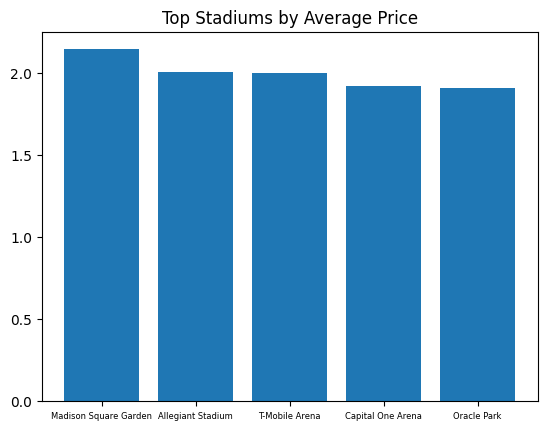

In [13]:
# Which stadiums dominate by price, rating
by_stadium_rating = usa.groupby('stadium')['rating'].mean().reset_index()
top_five_rating = by_stadium_rating.sort_values(by='rating', ascending=False)[:5]
rating_title = 'Top Stadiums by Average Rating'

by_stadium_price = usa.groupby('stadium')['price'].mean().reset_index()
top_five_price = by_stadium_price.sort_values(by='price', ascending=False)[:5]
price_title = 'Top Stadiums by Average Price'

plt.bar(top_five_rating['stadium'], top_five_rating['rating'])
plt.title(rating_title)
plt.xticks(fontsize='6')

plt.figure()

plt.bar(top_five_price['stadium'], top_five_price['price'])
plt.title(price_title)
plt.xticks(fontsize='6')

print()

<div style = 'font-family: Calibri, sans-serif'>
    
For both rating and price, we see exactly what we expected to: The top five stadiums for each include:
    
1. New York City:
    - Madison Square Garden
    - Barclays Center
2. San Francisco
    - Oracle Park 
    - Chase Center
3. Los Angeles
    - Staples Center
4. Las Vegas
    - Allegiant Stadium
    - T-Mobile Arena
5. Washington D.C.
    - Capital One Arena
    
All three of these cities are in the top five American metropolitan areas, and are significant cultural and economic centers of their respective states. 

<div style = 'font-family: Calibri, sans-serif'>
    
#### 7.1.2 Choropleth Plots for State & City
    
Given that we have locations for each stadium, we can generate some spatial plots to show the spread of average rating and price by overall regions rather than individual arenas. However, we do expect to see similar results as last time. 

<div style = 'font-family: Calibri, sans-serif'>
    
# INSERT ANALYSIS FOR CHOROPLETHS HERE

<div style = 'font-family: Calibri, sans-serif'>

## 7. Analysis
    
    
blah blah blah

In [14]:
# @ Aryaman:
# Insert your folium plots, etc. for analyssi and start discussing how it answers questions. 

<div style = 'font-family: Calibri, sans-serif'>

## 8. Summary & Results

<div style = 'font-family: Calibri, sans-serif'>


## 9. Discussion

#### Limitations
    
In any data science project, it is important to consider the significant limitations of any given process, and what impact those limits may have had on the results to be drawn from the project. In this project, the most significant limitation comes from the fact that the dataset base we are using is preset scraped from Yelp data. As such, the database creator's restriction to 3000m radii and Yelp-focus means that data outside these considerations are not represented. 
    
As such, the results we draw from our process are limited to the scope available to the data. This project is not generalizable to questions of whether these food trends are representative of the city, or even representative of the sporting scene as a whole, given that restaurants that exist outside the 3000m radius would contribute to these. 

<div style = 'font-family: Calibri, sans-serif'>

## 10. Conclusions & Future